In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv("data/Merged_Bitcoin_FearAndGreed.csv")
df['Date'] = pd.to_datetime(df['Date'])

df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2023-12-31')]

df = df.sort_values('Date')



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20192\589578135.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20192\589578135.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


In [3]:
df.duplicated()

1884    False
1883    False
1882    False
1881    False
1880    False
        ...  
4       False
3       False
2       False
1       False
0       False
Length: 1885, dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1884 to 0
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1885 non-null   datetime64[ns]
 1   Close                  1885 non-null   float64       
 2   Open                   1885 non-null   float64       
 3   High                   1885 non-null   float64       
 4   Low                    1885 non-null   float64       
 5   Change                 1885 non-null   float64       
 6   Change Classification  1885 non-null   object        
 7   Value                  1885 non-null   float64       
 8   Value_Classification   1885 non-null   object        
 9   BTC_Closing            1885 non-null   float64       
 10  BTC_Volume             1885 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 176.7+ KB


In [5]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Change Classification', 'Value_Classification']
Numerical columns : ['Date', 'Close', 'Open', 'High', 'Low', 'Change', 'Value', 'BTC_Closing', 'BTC_Volume']


In [6]:
df[cat_col].nunique()

Change Classification    3
Value_Classification     5
dtype: int64

In [7]:
df.head()

,Date,Close,Open,High,Low,Change,Change Classification,Value,Value_Classification,BTC_Closing,BTC_Volume
1884,2018-02-01,9181.1,10266.2,10303.0,8789.2,-0.1056,Down,30.0,Fear,9170.540039,9959400448
1883,2018-02-02,8893.2,9179.8,9201.4,7915.8,-0.0314,Down,15.0,Extreme Fear,8830.750000,12726899712
1882,2018-02-03,9241.1,8894.4,9506.9,8249.3,0.0391,Up,40.0,Fear,9174.910156,7263790080
1881,2018-02-04,8222.2,9241.5,9382.1,7932.1,-0.1103,Down,24.0,Extreme Fear,8277.009766,7073549824
1880,2018-02-05,6938.5,8220.8,8383.2,6651.9,-0.1561,Down,11.0,Extreme Fear,6955.270020,9285289984


In [32]:
# Remove insignificant columns 

df1 = df.drop(columns=['Change Classification', 'Open', 'High', 'Low', 'Change', 'BTC_Volume', 'Value'])
df1.head()

,Date,Close,Value_Classification,BTC_Closing
1884,2018-02-01,9181.1,Fear,9170.540039
1883,2018-02-02,8893.2,Extreme Fear,8830.750000
1882,2018-02-03,9241.1,Fear,9174.910156
1881,2018-02-04,8222.2,Extreme Fear,8277.009766
1880,2018-02-05,6938.5,Extreme Fear,6955.270020


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1884 to 0
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1885 non-null   datetime64[ns]
 1   Close                 1885 non-null   float64       
 2   Value                 1885 non-null   float64       
 3   Value_Classification  1885 non-null   object        
 4   BTC_Closing           1885 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 88.4+ KB


In [16]:
df1.duplicated()

1884    False
1883    False
1882    False
1881    False
1880    False
        ...  
4       False
3       False
2       False
1       False
0       False
Length: 1885, dtype: bool

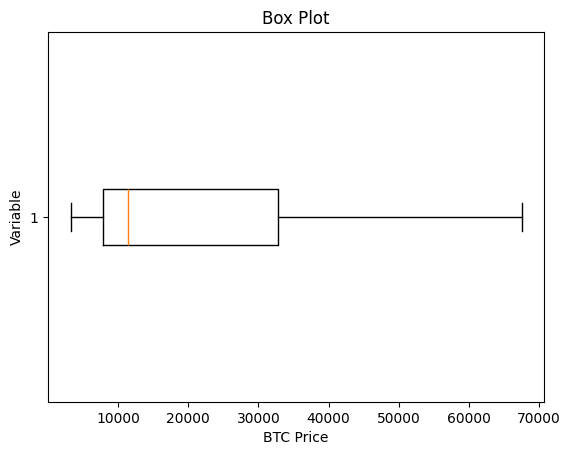

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Close'], vert=False)
plt.ylabel('Variable')
plt.xlabel('BTC Price')
plt.title('Box Plot')
plt.show()

In [40]:
Q1 = df1['Close'].quantile(0.25)
Q3 = df1['Close'].quantile(0.75)
IQR = Q3 - Q1

print('Interquartile range: ', IQR)

#The lower bound is negative, hence we use 0 
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print('Lower bound: ', lower_bound) 
print('Upper bound ', upper_bound)

Interquartile range:  24885.699999999997
Lower bound:  0
Upper bound  70056.65


In [41]:
max_value = df1['Close'].max()
print('Max value: ', max_value)

Max value:  67527.9


In [51]:
df1.drop(columns=['Sentiment'])

,Date,Close,Value_Classification,BTC_Closing
1884,2018-02-01,9181.1,Fear,9170.540039
1883,2018-02-02,8893.2,Extreme Fear,8830.750000
1882,2018-02-03,9241.1,Fear,9174.910156
1881,2018-02-04,8222.2,Extreme Fear,8277.009766
1880,2018-02-05,6938.5,Extreme Fear,6955.270020
...,...,...,...,...
4,2023-03-27,27129.8,Greed,27139.888672
3,2023-03-28,27262.2,Greed,27268.130859
2,2023-03-29,28350.4,Greed,28348.441406
1,2023-03-30,28029.5,Greed,28033.562500


In [59]:
sentiment_map = {
    'Extreme Greed': 5,
    'Greed': 4,
    'Neutral': 3,
    'Fear': 2,
    'Extreme Fear': 1
}

df1['Value_Classification'].map(sentiment_map)
df2 = df1.drop(columns=['Value_Classification', 'Close'])

In [60]:
df2.head()

,Date,BTC_Closing,Sentiment
1884,2018-02-01,9170.540039,2
1883,2018-02-02,8830.750000,1
1882,2018-02-03,9174.910156,2
1881,2018-02-04,8277.009766,1
1880,2018-02-05,6955.270020,1


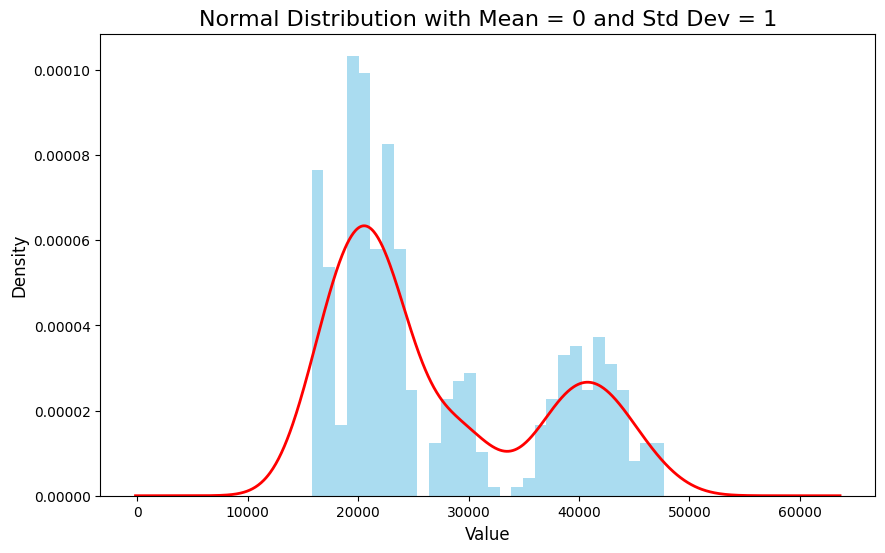

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate data for a normal distribution
mean = 0
std_dev = 1
size = 1000
data = np.random.normal(mean, std_dev, size)

df2 = df2[(df2['Date'] >= '2022-01-01') & (df2['Date'] <= '2023-12-31')]


# Plotting the normal distribution
plt.figure(figsize=(10, 6))
df2['BTC_Closing'].plot(kind='hist', bins=30, density=True, color='skyblue', alpha=0.7)
df2['BTC_Closing'].plot(kind='kde', color='red', linewidth=2)

plt.title('Normal Distribution with Mean = 0 and Std Dev = 1', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


In [67]:
df2.head()

,Date,BTC_Closing,Sentiment
454,2022-01-01,47686.812500,1
453,2022-01-02,47345.218750,2
452,2022-01-03,46458.117188,2
451,2022-01-04,45897.574219,1
450,2022-01-05,43569.003906,1


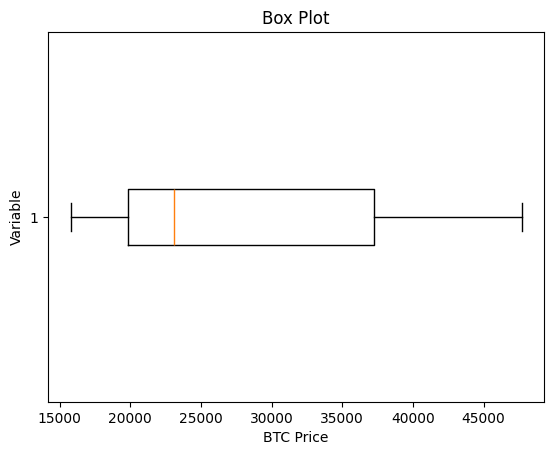

In [68]:
import matplotlib.pyplot as plt

plt.boxplot(df2['BTC_Closing'], vert=False)
plt.ylabel('Variable')
plt.xlabel('BTC Price')
plt.title('Box Plot')
plt.show()

In [69]:
Q1 = df1['Close'].quantile(0.25)
Q3 = df1['Close'].quantile(0.75)
IQR = Q3 - Q1

print('Interquartile range: ', IQR)

#The lower bound is negative, hence we use 0 
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print('Lower bound: ', lower_bound) 
print('Upper bound ', upper_bound)

Interquartile range:  24885.699999999997
Lower bound:  0
Upper bound  70056.65


In [72]:
max_value = df2['BTC_Closing'].max()
print('Max value: ', max_value)

Max value:  47686.8125


In [73]:
df2.head()

,Date,BTC_Closing,Sentiment
454,2022-01-01,47686.812500,1
453,2022-01-02,47345.218750,2
452,2022-01-03,46458.117188,2
451,2022-01-04,45897.574219,1
450,2022-01-05,43569.003906,1


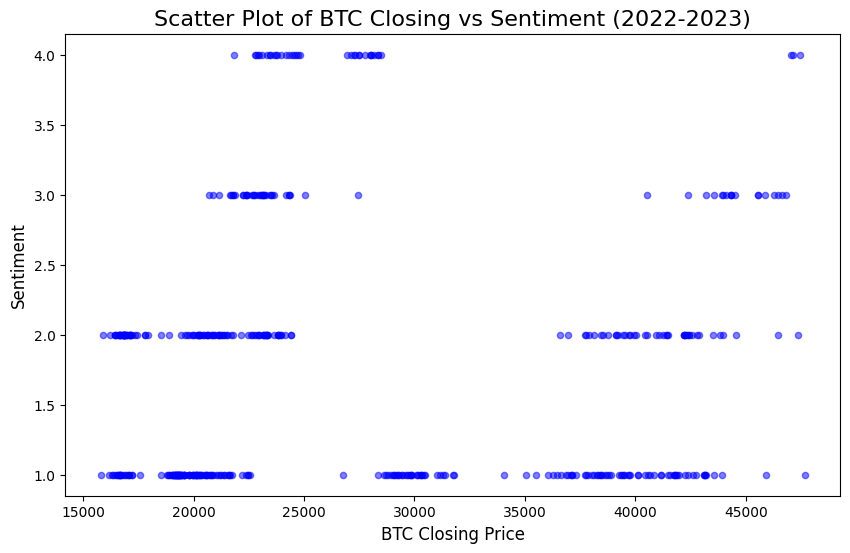

In [74]:
df2.plot(kind='scatter', x='BTC_Closing', y='Sentiment', color='blue', alpha=0.5, figsize=(10, 6))

# Adding title and labels
plt.title('Scatter Plot of BTC Closing vs Sentiment (2022-2023)', fontsize=16)
plt.xlabel('BTC Closing Price', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.show()

In [82]:
df2['BTC_Closing'] = df2['BTC_Closing'].round()

df2.head()

,Date,BTC_Closing,Sentiment
454,2022-01-01,47687.0,1
453,2022-01-02,47345.0,2
452,2022-01-03,46458.0,2
451,2022-01-04,45898.0,1
450,2022-01-05,43569.0,1


In [79]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display the entire DataFrame
print(df2)

          Date  BTC_Closing  Sentiment
454 2022-01-01      47687.0          1
453 2022-01-02      47345.0          2
452 2022-01-03      46458.0          2
451 2022-01-04      45898.0          1
450 2022-01-05      43569.0          1
449 2022-01-06      43161.0          1
448 2022-01-07      41558.0          1
447 2022-01-08      41734.0          1
446 2022-01-09      41912.0          1
445 2022-01-10      41821.0          1
444 2022-01-11      42736.0          1
443 2022-01-12      43949.0          1
442 2022-01-13      42592.0          1
441 2022-01-14      43100.0          1
440 2022-01-15      43177.0          1
439 2022-01-16      43114.0          1
438 2022-01-17      42251.0          1
437 2022-01-18      42376.0          1
436 2022-01-19      41744.0          1
435 2022-01-20      40680.0          1
434 2022-01-21      36457.0          1
433 2022-01-22      35030.0          1
432 2022-01-23      36277.0          1
431 2022-01-24      36654.0          1
430 2022-01-25      36954

In [84]:
# Calculate the Pearson correlation between BTC_Closing and Sentiment
correlation = df2['BTC_Closing'].corr(df2['Sentiment'])

print(f"Correlation between BTC Closing Price and Sentiment: {correlation}")


Correlation between BTC Closing Price and Sentiment: 0.02827434153319143


In [85]:
df2.to_csv('cleaned_bitcoin_data.csv', index=False)